In [142]:
import networkx as nx
import math
import random

from util import parse_graph_from_edgelist_file
from solver import SteinerTreeSolver

# Steiner Tree Problem
Those of you who have already heard the "Netzwerkalgorithmen" lecture are probably familiar with the concept of a *Minimum Spanning Tree*. In short, such a tree graph is a cost-minimal (costs associated with edges) subset of the edges in an undirected graph, such that all nodes are part of this tree (and therefore pairwise connected over a path in the tree). This problem can be solved in polynomial time, e.g. using the algorithm of Kruskal.

A special variant of this problem is the *Steiner Tree* problem. In this problem, some nodes of the graph are labeled as "terminals". Now, the *Steiner Tree* problem asks for the cost-minimal tree within the graph which is "only" required to connect all terminals. Unlike the Minimum Spanning Tree problem, this problem is known to be NP-hard. 

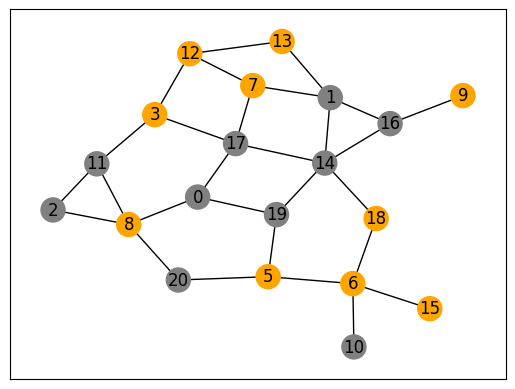

In [143]:
G = parse_graph_from_edgelist_file("instances/graph1.edges")
positions = nx.layout.kamada_kawai_layout(G)

for (p, q) in G.edges():
    distance = math.dist(positions[p], positions[q])
    G[p][q]["weight"] = distance

terminals = random.sample(list(G.nodes()), k=G.number_of_nodes() // 2)
nx.draw_networkx(G, pos=positions, node_color=["orange" if v in terminals else "grey" for v in G.nodes()])

Set parameter LazyConstraints to value 1
Root node: 13
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (linux64)
Thread count: 12 physical cores, 24 logical processors, using up to 24 threads
Optimize a model with 93 rows, 56 columns and 314 nonzeros
Model fingerprint: 0xaf8b4ca0
Variable types: 0 continuous, 56 integer (56 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 4e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 5.0486797
Presolve removed 38 rows and 10 columns
Presolve time: 0.00s
Presolved: 55 rows, 46 columns, 154 nonzeros
Variable types: 0 continuous, 46 integer (46 binary)
Found heuristic solution: objective 5.0039985

Root relaxation: objective 4.748107e+00, 25 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    

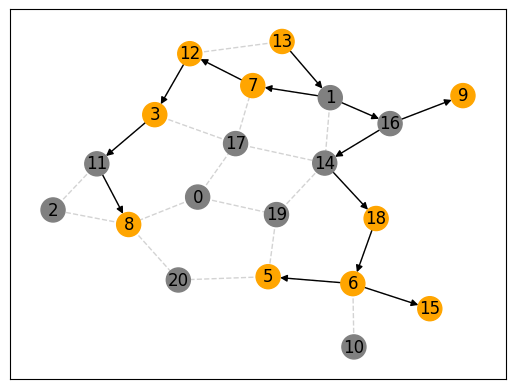

In [144]:
solver = SteinerTreeSolver(G)
tree = solver.solve(terminals)
nx.draw_networkx_nodes(G, pos=positions, node_color=["orange" if v in terminals else "grey" for v in G.nodes()])
nx.draw_networkx_edges(G, pos=positions, style="dashed", edge_color="lightgrey")
nx.draw_networkx_edges(tree, pos=positions)
nx.draw_networkx_labels(G, pos=positions)
print("Done!")